In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('train.csv')
df

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom
...,...,...,...,...,...,...,...,...,...,...
996,996,33,Non-binary,Twitter,85.0,4.0,35.0,18.0,18.0,Boredom
997,997,22,Female,Facebook,70.0,1.0,14.0,6.0,10.0,Neutral
998,998,35,Male,Whatsapp,110.0,3.0,50.0,25.0,25.0,Happiness
999,999,28,Non-binary,Telegram,60.0,2.0,18.0,8.0,18.0,Anger


In [3]:
df.value_counts()

User_ID  Age  Gender      Platform   Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  Dominant_Emotion
1        25   Female      Instagram  120.0                       3.0            45.0                    10.0                       12.0                   Happiness           1
702      30   Male        Twitter    90.0                        4.0            30.0                    20.0                       22.0                   Anger               1
691      27   Non-binary  Facebook   50.0                        1.0            10.0                    4.0                        10.0                   Boredom             1
692      32   Female      Whatsapp   105.0                       4.0            55.0                    25.0                       25.0                   Anger               1
693      24   Male        Telegram   75.0                        3.0            37.0                    16.0                 

In [4]:
print(df.dtypes)

User_ID                        object
Age                            object
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object


In [5]:
print(df.isna().sum())
print(df.isna().sum().sum())

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64
8


In [6]:
df=df.drop(columns=['User_ID'],axis=1)
df['Daily_Usage_Time (minutes)'] = df['Daily_Usage_Time (minutes)'].fillna(df['Daily_Usage_Time (minutes)'].mean())  
df['Posts_Per_Day'] = df['Posts_Per_Day'].fillna(df['Posts_Per_Day'].median())  
df['Gender'] = df['Gender'].fillna(method='ffill')  
df['Dominant_Emotion'] = df['Dominant_Emotion'].fillna(method='bfill') 

C:\Users\Cv\AppData\Local\Temp\ipykernel_12692\1172451635.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Gender'] = df['Gender'].fillna(method='ffill')
C:\Users\Cv\AppData\Local\Temp\ipykernel_12692\1172451635.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Dominant_Emotion'] = df['Dominant_Emotion'].fillna(method='bfill')


In [7]:
df=df.dropna()
print(df.isna().sum())
print('Missing Values : ',df.isna().sum().sum())
print('Duplicated Values : ',df.duplicated().sum())

Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Missing Values :  0
Duplicated Values :  762


In [8]:
df['Age'].value_counts()

Age
28            92
27            92
29            90
22            74
26            66
25            64
24            64
31            62
21            56
33            56
30            48
23            48
35            38
32            38
34            36
Male          28
Female        26
Non-binary    22
Name: count, dtype: int64

In [9]:
df[df['Age'].isin(['Male','Female','Non-binary'])]

,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...
784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


In [10]:
condition=df['Age'].isin(['Female','Male','Non-binary'])
df.loc[condition, ['Age', 'Gender']] = df.loc[condition, ['Gender', 'Age']].values
print(df['Gender'].unique())
print(df['Age'].unique())

['Female' 'Male' 'Non-binary']
['25' '30' '22' '28' '33' '21' '27' '24' '29' '31' '23' '26' '34' '35'
 '32']


In [11]:
df.loc[:,'Age']=df['Age'].astype('int')

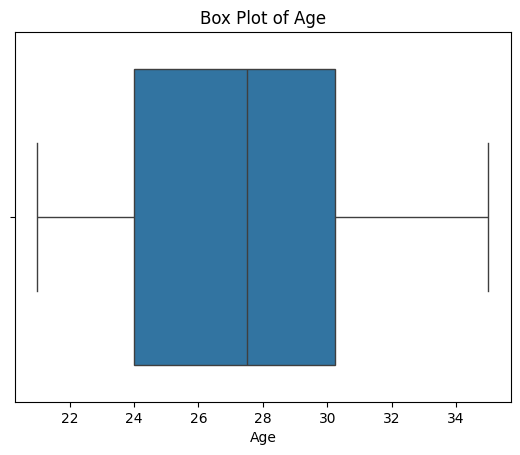

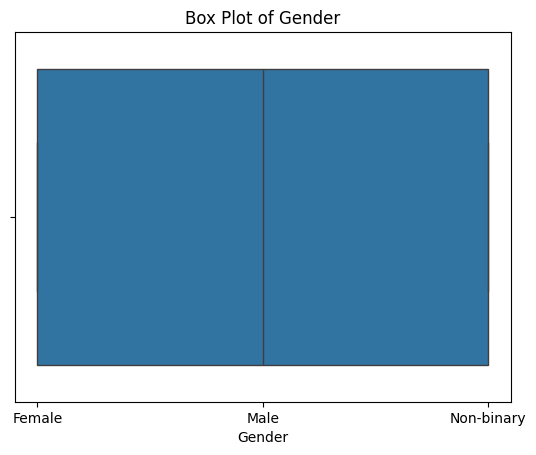

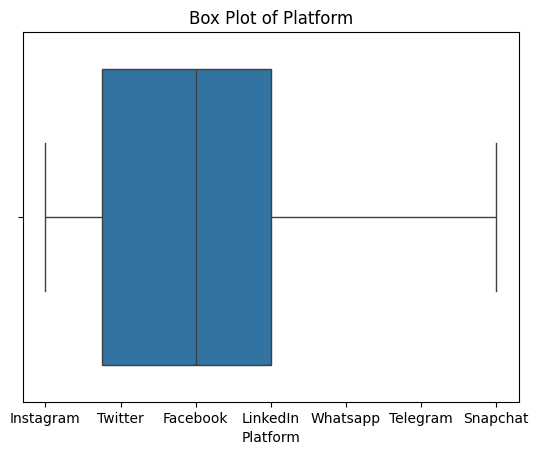

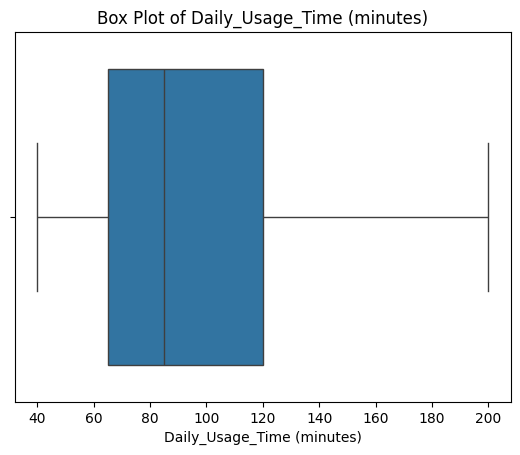

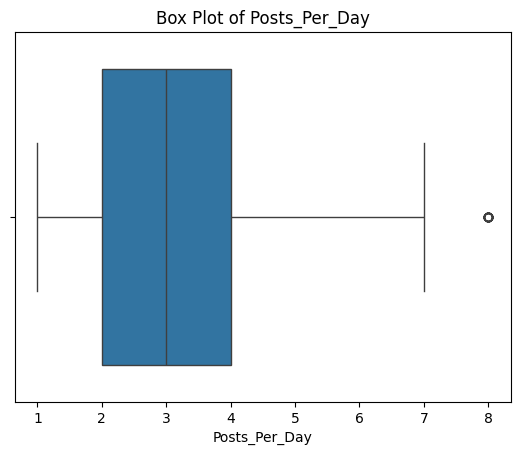

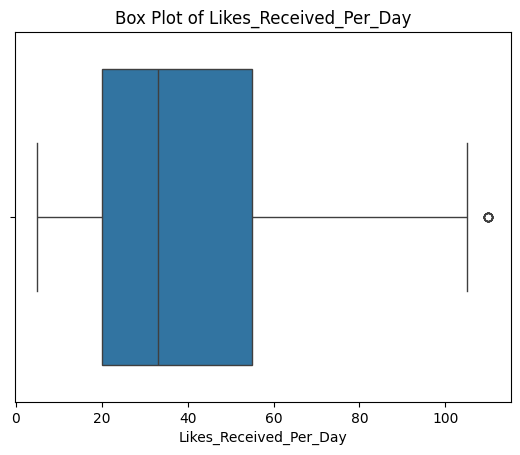

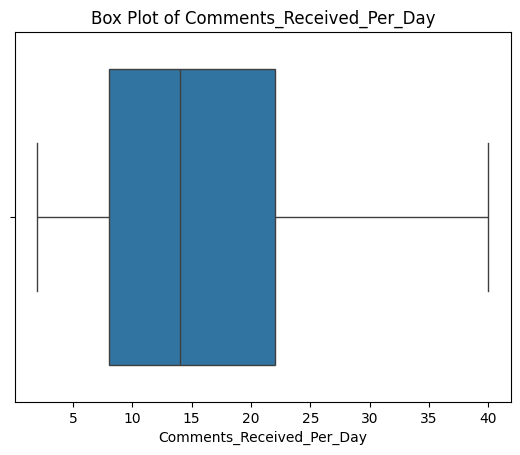

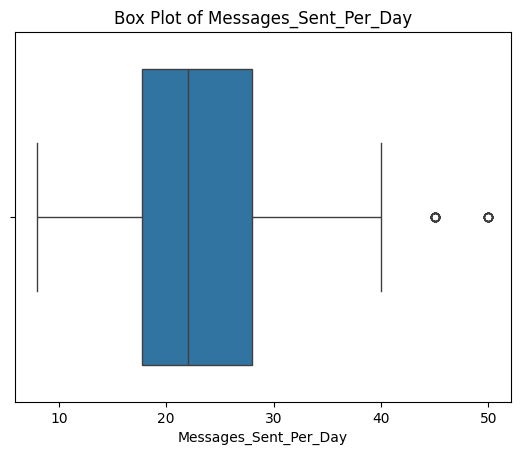

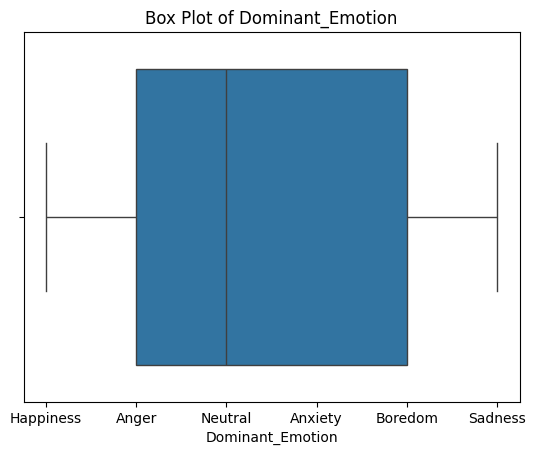

In [12]:
for column in df.columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    

In [13]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['binned_column'] = discretizer.fit_transform(df[['numerical_column']])

NameError: name 'KBinsDiscretizer' is not defined

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
df_sample = df[['Age', 'Platform', 'Dominant_Emotion']]  
df_encoded = pd.get_dummies(df_sample)
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

    support                                          itemsets
0      0.10                                          (Age_27)
1      0.10                                          (Age_28)
2      0.10                                          (Age_29)
3      0.19                               (Platform_Facebook)
4      0.25                              (Platform_Instagram)
5      0.12                               (Platform_LinkedIn)
6      0.20                                (Platform_Twitter)
7      0.13                          (Dominant_Emotion_Anger)
8      0.17                        (Dominant_Emotion_Anxiety)
9      0.14                        (Dominant_Emotion_Boredom)
10     0.20                      (Dominant_Emotion_Happiness)
11     0.20                        (Dominant_Emotion_Neutral)
12     0.16                        (Dominant_Emotion_Sadness)
13     0.17  (Platform_Instagram, Dominant_Emotion_Happiness)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)